# Chapter 02) 데이터 다루기


## 02-1. 훈련 세트와 테스트 세트

핵심 키워드 : 지도 학습, 비지도 학습, 훈련 세트, 테스트 세트

의문; "도미 35마리와 빙어 14마리를 모두 저장하고 맞추는 거라면 100%를 달성하는 게 당연하지 않나요? 어떤 것이 도미이고 빙어인지 알고 있는데 맞추지 못하는 것이 이상하잖아요."

머신러닝 알고리즘 > 지도 학습 / 비지도 학습 / 강화 학습\
- **지도 학습** : 입력과 타깃을 전달하여 모델을 훈련한 다음 새로운 데이터를 예측하는 데 활용\
알고리즘은 훈련하기 위한 데이터와 **정답이 필요**!\
데이터와 정답을 입력(input)과 타깃(target)이라고 하고, 이 둘을 합쳐 훈련 데이터(training data)라고 부르며, 입력으로 사용된 길이와 무게를 **특성**이라고 한다.
- 비지도 학습은 타깃 데이터가 없다. 무엇을 예측하는 것이 아니라 입력 데이터에서 어떤 **특징을 찾는 데 주로 활용**한다.
- 강화 학습 알고리즘은 타깃이 아니라 알고리즘이 행동한 **결과로 얻은 보상을 사용해 학습**됨!

### 훈련 세트와 테스트 세트

연습 문제와 시험 문제가 달라야 올바르게 학생의 능력을 평가할 수 있듯이 머신러닝 알고리즘의 성능을 제대로 평가하려면 훈련 데이터와 평가에 사용할 데이터가 각각 달라야 한다.\
이렇게 하는 가장 간단한 방법은 평가를 위해 또 다른 데이터를 준비하거나 이미 준비된 데이터 중에서 일부를 떼어 내어 활용하는 것이다. 일반적으로 후자의 경우가 많다. 평가에 사용하는 데이터를 **테스트 세트**, 훈련에 사용되는 데이터를 **훈련 세트**라고 부른다.\
테스트 세트는 전체 데이터에서 20~30%를 테스트 세트로 사용하는 경우가 많다. 전체 데이터가 아주 크다면 1%만 덜어내도 충분할 수 있다.

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [ ]:
# 하나의 생선 데이터를 샘플이라고 부름. 사용하는 특성은 길이와 무게 2개!
# 처음 35개를 훈련 세트, 나머지 14개를 테스트 세트로 사용한다면? (도미 35마리, 빙어 14마리) -> 처음 35개는 다 도미니까 전부 도미로 예측되겠네..

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

print(fish_data[4]) # fish_data의 다섯번째 샘플 출력(인덱스가 0부터 시작)
print(fish_data[0:5]) # fish_data의 0 ~ (5-1)까지 샘플 출력 (0은 생략하고 [:5]로 써도 됨)
print(fish_data[44:]) # fish_data의 44번째 샘플부터 끝까지

# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

[29.0, 430.0]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

**샘플링 편향** 문제; 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않고 샘플링이 한쪽으로 치우친 것\
훈련 세트와 테스트 세트를 나누기 전에 데이터를 섞든지 아니면 골고루 샘플을 뽑아서 훈련 세트와 테스트 세트를 만들어야 한다.

**넘파이**; 파이썬의 대표적인 배열(array) 라이브러리 → 고차원의 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구를 많이 제공\
차원(dimension)이란 말은 조금씩 다른 의미로 쓰일 수 있다. 배열에서 차원은 좌표계의 축과 같다.\
1차원 배열은 선이고, 2차원 배열은 면, 3차원 배열은 3차원 공간을 나타낸다.

In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)
print(input_arr.shape) # 배열의 크기 출력

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


In [ ]:
index = np.where(input_arr == 25.4)
print(index)

index = np.where(input_arr == 950)
print(index)

index = np.where(input_arr == 15)
print(index)

(array([0]), array([0]))
(array([34]), array([1]))
(array([48]), array([0]))


넘파이 배열에서 랜덤하게 샘플을 선택해 훈련 세트와 테스트 세트로 만들기 위해 무작위로 샘플을 고르는 방법 사용\
! 주의할 점 : input_arr와 target_arr에서 **같은 위치**는 **함께 선택**되어야 한다. (타깃이 샘플과 함께 이동하지 않으면 올바르게 훈련될 수 없음) \
→ 인덱스값을 기억?

In [ ]:
np.random.seed(42) # 랜덤 시드 고정
index = np.arange(49) # 0 ~ 48까지 1씩 증가하는 인덱스 생성
print(index)
np.random.shuffle(index) # index 배열을 무작위로 섞음
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


배열 인덱싱; 배열(array)에서 특정 요소나 요소들의 위치를 가리키는 인덱스를 사용해 데이터를 조회하거나 수정하는 방법\
1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있다

In [ ]:
print(input_arr[[1, 3]])

# 넘파이 배열을 인덱스로 전달
train_input = input_arr[index[:35]] # index 배열에서 앞 35개의 인덱스를 사용
train_target = target_arr[index[:35]]
print(train_input)

# 만들어진 new index의 첫번째값은 13 -> train_input의 첫번째 원소에 input_arr(기존 데이터)의 열네번째 원소가 들어있을 것
print(input_arr[13], train_input[0])

[[ 26.3 290. ]
 [ 29.  363. ]]
[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]
[ 32. 340.] [ 32. 340.]


헷갈리는 점) print(index)에서 첫번째값이 13이 나왔으면 input_arr의 첫번째값인 [  25.4  242. ]가 index 13을 가져야 하는 거 아니야?\
**고유의 인덱스는 변하지 않고** print(index)-> index 기준 위치 순서 프린트\
셔플하지 않은 원래 index는 [0 1 2 3 4 5 ... 48]

In [ ]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

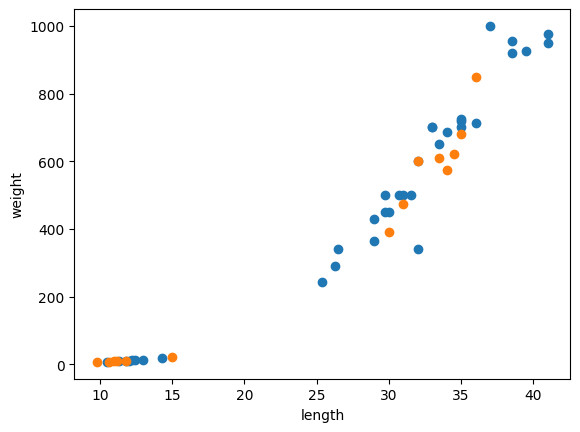

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) # 파란색
plt.scatter(test_input[:,0], test_input[:,1]) # 주황색
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# fit() 메서드를 실행할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 모든 것을 잃어버림
# 이전 모델을 그대로 두고 싶다면 KNeighborsClassifier 클래스 객체를 새로 만들어야 함
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
print(kn.predict(test_input))
print(test_target) # 사이킷런 모델의 입력과 출력은 모두 넘파이 배열이다!

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


## 02-2. 데이터 전처리

핵심 키워드 : 데이터 전처리, 표준점수, 브로드캐스팅

In [ ]:
import numpy as np

In [ ]:
np.column_stack(([1,2,3], [4,5,6])) # column_stack() 함수는 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결함

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

np.ones() : 각각 원하는 개수의 1을 채운 배열을 만드는 함수\
np.zeros() : 각각 원하는 개수의 0을 채운 배열을 만드는 함수

In [ ]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 괄호 하나 더 씌워줘야 함
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) # 퍼센트 설정 안하면 25%

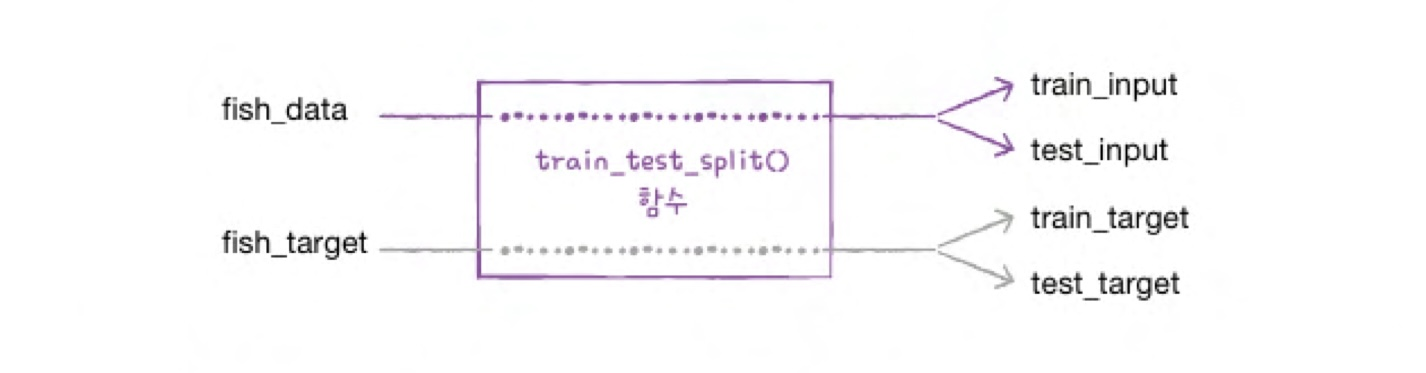

In [ ]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target) # 원래 도미 : 빙어 = 2.5:1이었는데 test set에서는 3.3:1로 샘플링 편향 조금 나타남

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42) # stratify 매개변수 사용 > 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔

In [ ]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### 수상한 도미 한 마리

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
print(kn.predict([[25, 150]])) # 도미 데이터인데 빙어로 분류됨

[0.]


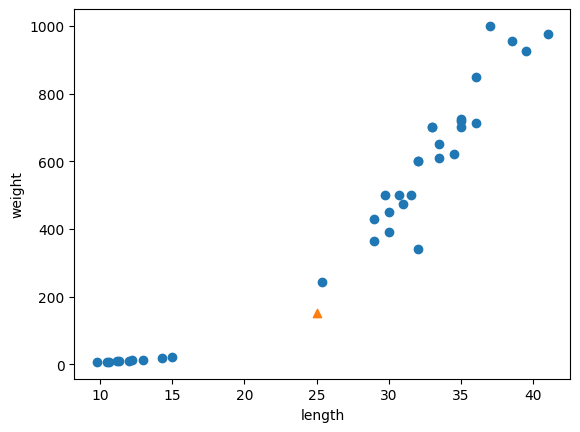

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]]) # 가장 가까운 이웃들을 찾는 역할

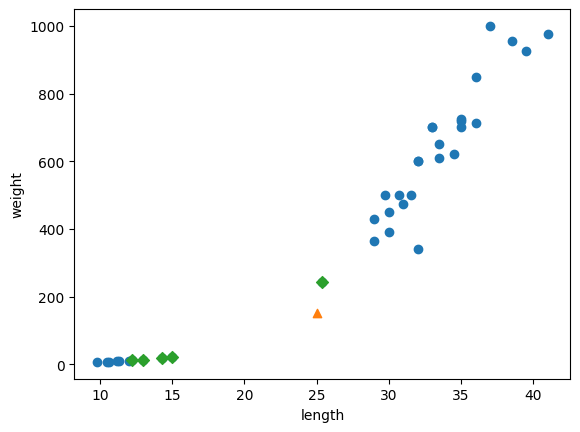

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # 이웃 샘플(5개)을 초록색 다이아몬드로 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
# 산점도로 보면 도미와 가깝게 보이는데, 왜 가장 가까운 이웃을 빙어라고 생각했을까? > x축, y축 범위가 다르기 때문
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


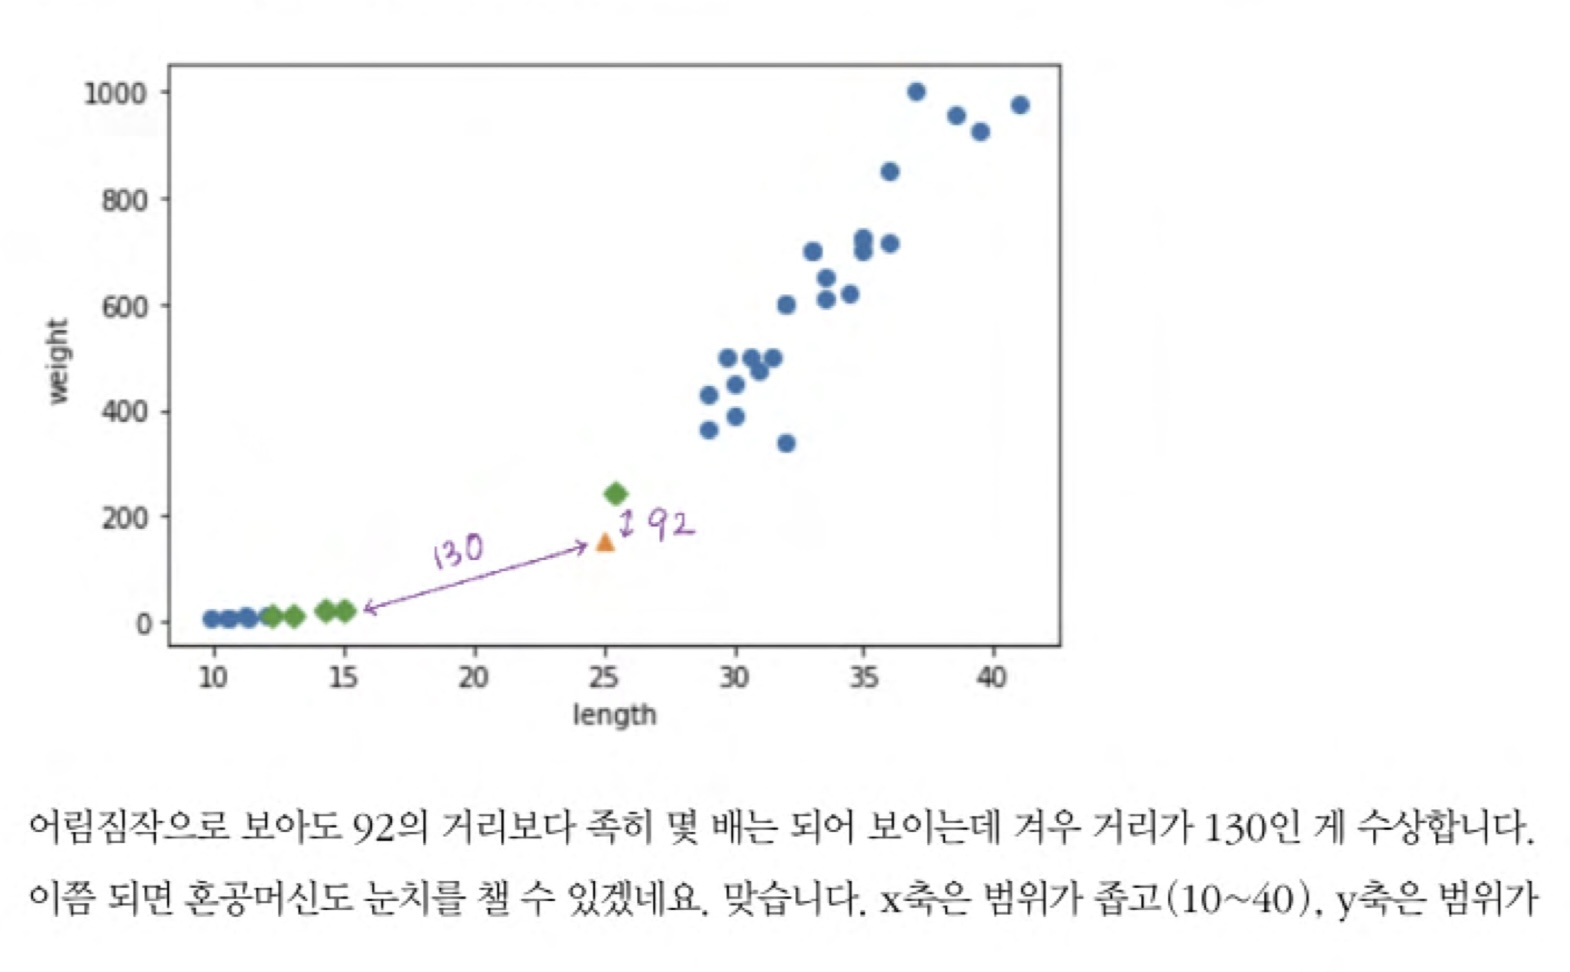

### 기준을 맞춰라

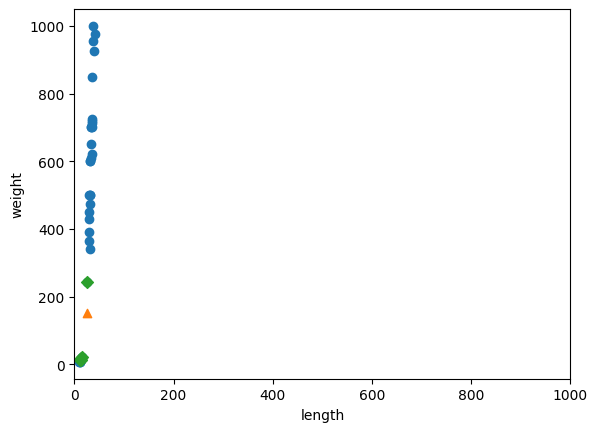

In [ ]:
# x축의 범위를 동일하게 0~1000으로 맞춰보자(스케일이 다른 경우)
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

생선의 길이(x축)는 가장 가까운 이웃을 찾는 데 크게 영향을 미치지 못함\
오로지 생선의 무게(y축)만 고려 대상이 됨

가장 널리 사용하는 전처리 방법 중 하나는 **표준점수**이다(혹은 z점수라고도 부름).\
표준점수는 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다.\
이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.
* 분산은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구한다.\
표준편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타낸다.\
 **표준점수**는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값이다.

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [ ]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) /std # 넘파이 배열 사이에서 일어나는 브로드캐스팅

### 전처리 데이터로 모델 훈련하기

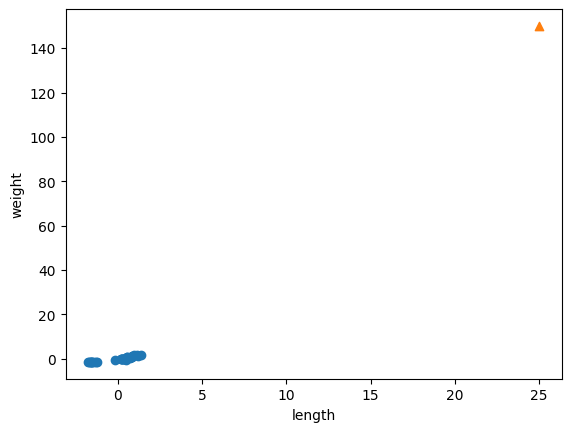

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
new = ([25, 150] - mean) / std # 새로운 값도 똑같이 표준화

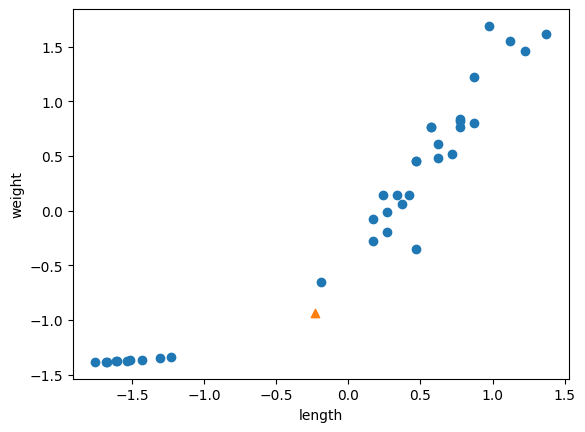

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
test_scaled = (test_input - mean) / std

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new]))

[1.]


In [ ]:
distances, indexes = kn.kneighbors([new])

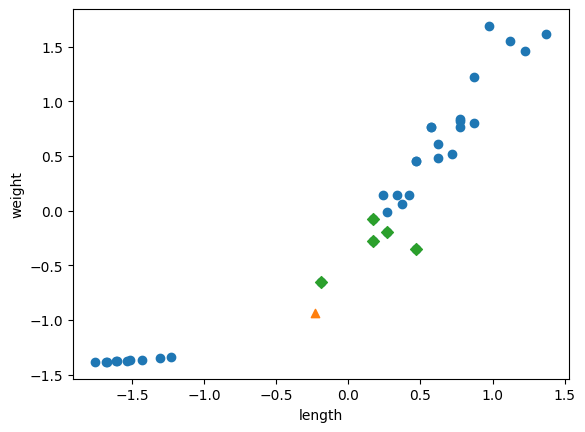

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이제 가장 가까운 샘플이 전부 도미! 예측 성공!\
특성값의 스케일에 민감하지 않고 안정적인 예측을 할 수 있는 모델

# 인프런 강의 - 파이썬 인공지능 활용

## 7-1. 웹 자료 수집하기(이론)

각각의 웹(web) 서버는 전 세계적으로 고유한 URL(Uniform Resource Locator)을 가짐\
https:// > 프로토콜\
www.pusan.ac.kr > 웹서버주소(IP나 도메인 이름)\
/kor/CMS/Contents/Contents.do > 웹페이지경로 \
?mCode=MN150 > 쿼리


웹 서버에 접속하기 위해서?
- 사용자가 URL을 웹 브라우저에 입력하여 연결 요청
- 요청 메세지 > 웹 서버 > 응답이 다시 사용자에게 돌아옴 = HTTP 절차(웹 상에서 클라이언트(사용자)와 서버 간에 데이터를 주고받는 규칙)
- HTML(HyperTextMarkupLanguage)로 기술된 웹 페이지 내용 응답
- 사용자 웹 브라우저가 HTML 내용에 따라 필요한 자원들을 가져다가 웹 페이지 조립

*하이퍼텍스트(HyperText) = Hyperlink + Text\
사용자가 브라우저에서 링크와 결합된 텍스트를 클릭하면 해당 링크로 이동

🖥️ 웹페이지 구성

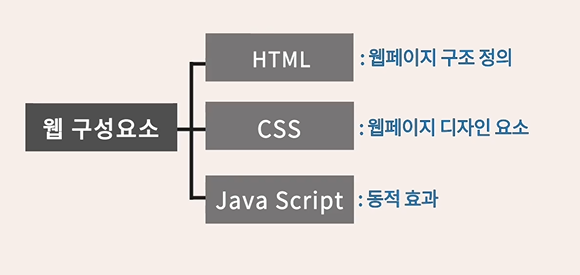

**HTML** 웹페이지 구조 정의, 태그(tag) 사용\
시작 태그와 종료 태그 사이에 내용 기술\
예) `<a> ... </a>` : 하이퍼링크를 삽입하는 태그\
요소 `<a href="https://www.google.com">`*(=시작태그)* `구글`*(=내용)* `</a>`*(=종료태그)* ; 실제 사용자한테는 '구글'만 보임

**CSS** 웹페이지 디자인 적용\
CSS로 표현된 스타일 정보는 HTML 문서 헤드(head) 부분에 `<style>` 태그로 감싸서 넣음\
디자인을 위한 부분을 따로 둔 이유는 문서 전체에서 같은 역할을 하는 항목들에 대해 **한꺼번에 디자인 적용이 가능하도록** 하기 위함\
선택자(selector)(앞에 나옴)와 선언(declaration)으로 구성
- 요소 선택자; HTML 태그를 기반으로 웹페이지의 요소를 선택
- 클래스 선택자; HTML 요소 중에 class 속성을 가진 요소를 선택
- 아이디 선택자; HTML 요소 중에 id 속성을 가진 요소를 선택(적용범위 제일 좁아)(강조하고 싶은 것에 특별한 id 부여 후 사용 가능!)




🖥️ HTML 만들기


```
<html>
<head>
<title> 기초프로그래밍_파이썬 </title>
<style>
  li {
     color: green
    }
    .sky {
     color: skyblue
}
    .sea {
     color: blue
}
    #pg {
     color: red
}
</style>
</head>

<body>
  <h1> This is a heading H1. </h1>
  <h2> This is a heading H2. </h2>
  <h3> This is a heading H3. </h3>
  <p> HTML과 CSS 연습 문서입니다. 문단을 나타내는 p </p>
  <img src = "sql 4주차_3.png">
  <ul>
    <li> unordered list </li>
    <li> 호랑이 </li>
    <li> 곰 </li>
    <li class = "sky"> 펭귄 </li>
    <li class = "sea"> 상어 </li>
    <li class = "sea"> 해마 </li>
    <li class = "sea" id="pg"> 고래 </li>

  </ul>

  <ol>
    <li> ordered list </li>
    <li> 호랑이 </li>
    <li> 곰 </li>
    <li> 펭귄 </li>
    <li> 상어 </li>
  </ol>

<table>
  <tr>
    <td> 어른 </td>
    <td> 어린이 </td>
  </tr>
  <tr>
    <td> 10000원 </td>
    <td> 5000원 </td>
  </tr>
</table>

</body>
</html>
```


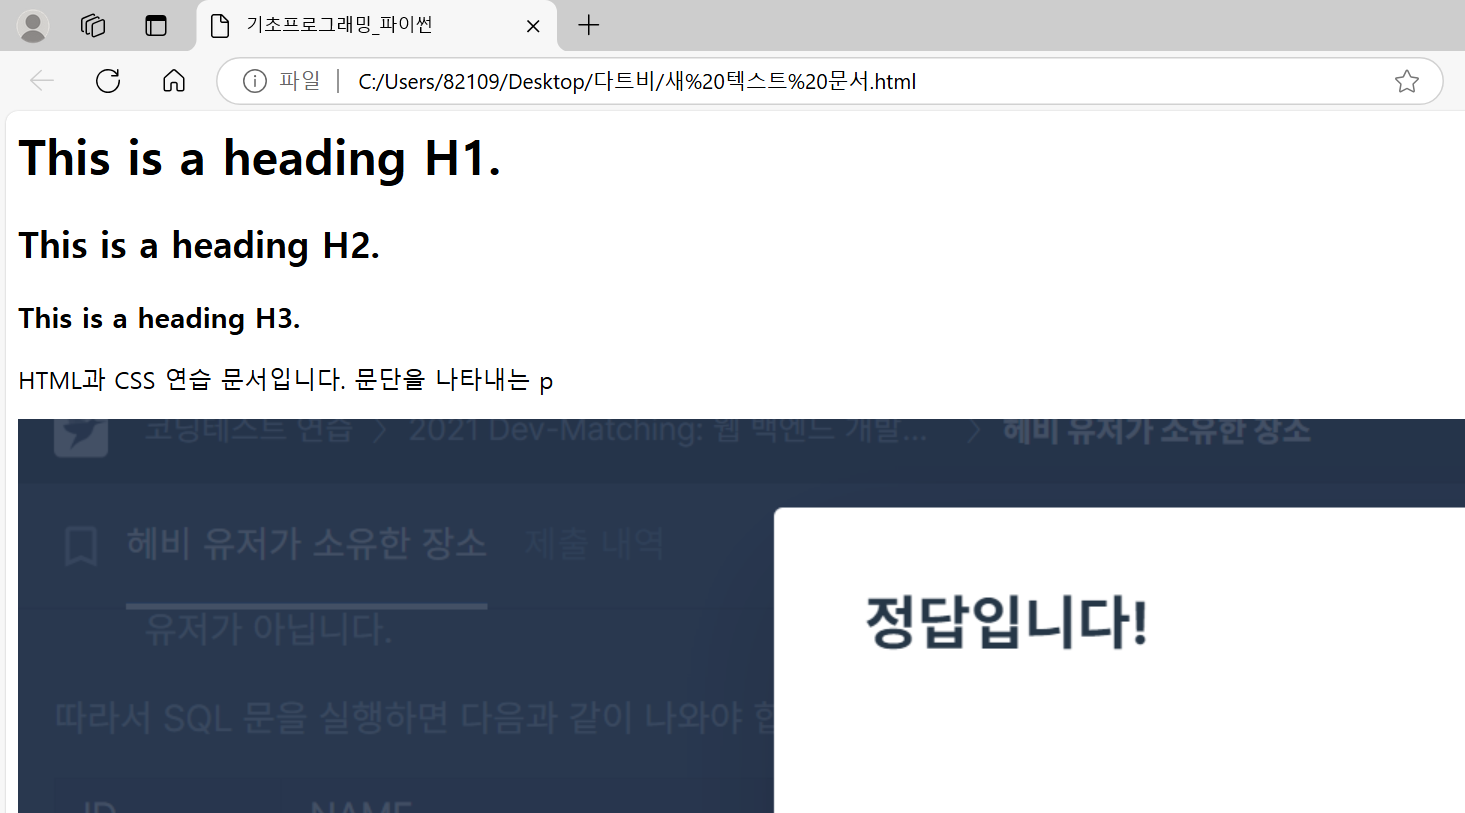
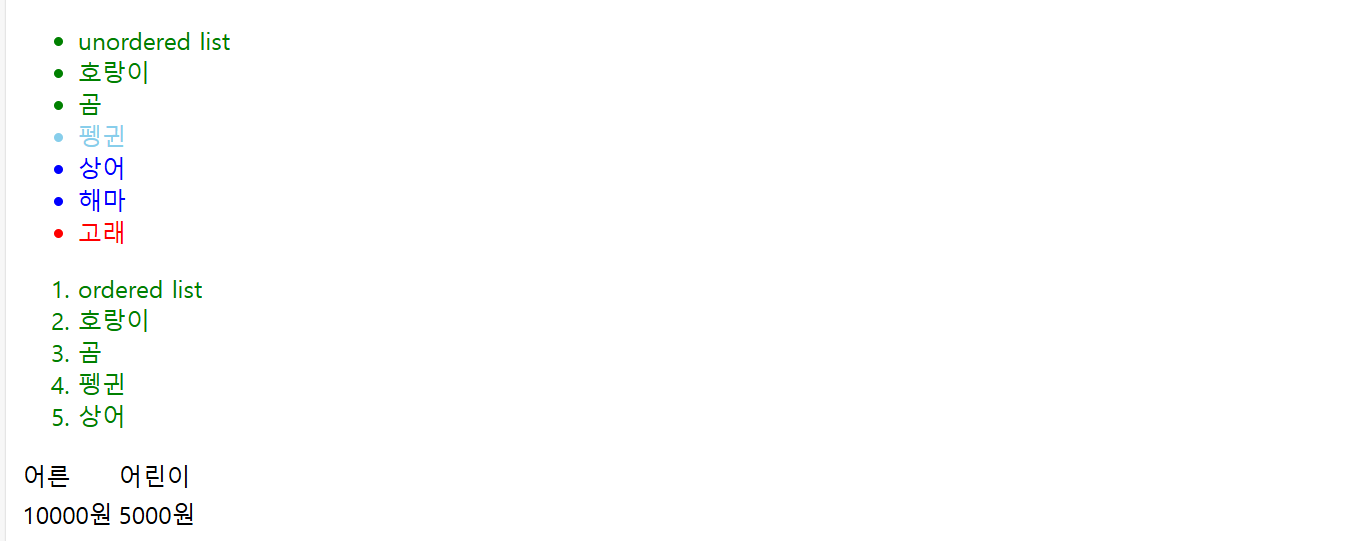

## 7-2. 웹 자료 수집하기(실습)

스크래핑(Scraping) : 웹페이지에서 필요한 데이터를 추출하는 기술

스크래핑 단계
1. 가져오기
  - 데이터를 추출할 웹사이트에 HTTP 요청 전송하여 웹 페이지 내용 받기
  - 받은 데이터(전세계의 서로 다른 데이터)를 **문자열 형식으로 변환**
  - urllib.request 모듈 활용


```
# 복사한 URL을 이용하여 접속, 웹페이지 내용 저장
urllib.request 모듈의 urlopen() 사용

from urllib.request import urlopen

url = 'http://bpms.kemco.or.kr/transport_2012/car_choice.aspx?serorigin=&serecode=&serfuel=&sergear=&sercartype=&sergrade=&sertypegb=&sertab=&otype=&ptype=200&f=system&sermileage1=&sermileage2=&serco21=&serco22=&seramt1=&seramt2=&sermname=&serstyear=#search_top'

htmlData = urlopen(url).read()

htmlData
```


2. 추출하기
  - 문자열 형식의 데이터를 HTML 문서 형태로 변환
  - 추출할 데이터들이 가진 공통적인 HTML 요소를 찾아 데이터 추출
  - BeautifulSoup 모듈 활용
3. 저장하기
  - 데이터를 원하는 형식으로 정리
  - 필요한 형태의 파일로 저장

In [ ]:
from urllib.request import Request, urlopen

url = 'http://bpms.kemco.or.kr/transport_2012/car_choice.aspx?serorigin=&serecode=&serfuel=&sergear=&sercartype=&sergrade=&sertypegb=&sertab=&otype=&ptype=200&f=system&sermileage1=&sermileage2=&serco21=&serco22=&seramt1=&seramt2=&sermname=&serstyear=#search_top'
# https://min24.energy.or.kr/trans_hp/AHP/HP_03/HP_03_01_010.do

# User-Agent 설정
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
htmlData = urlopen(req).read()
htmlData

b'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n <!-- CSRF Token apply - 2021.04.20 -->\r\n\r\n\t\r\n    \r\n     <div style="width:100%; height:700px; text-align:center; vertical-align:middle; padding-top:200px; font-size:larger;">\r\n\t\t<img alt="\xec\xa4\x80\xeb\xb9\x84\xec\xa4\x91\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4" src="/trans_hp/common/img/IndexContentBg.gif" />\r\n\t    <br />\r\n\t</div>\r\n    \r\n\r\n\r\n'

In [ ]:
# bytes 자료형을 문자열 자료 형태로 변환
htmlData = htmlData.decode('utf8')
htmlData

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n <!-- CSRF Token apply - 2021.04.20 -->\r\n\r\n\t\r\n    \r\n     <div style="width:100%; height:700px; text-align:center; vertical-align:middle; padding-top:200px; font-size:larger;">\r\n\t\t<img alt="준비중입니다" src="/trans_hp/common/img/IndexContentBg.gif" />\r\n\t    <br />\r\n\t</div>\r\n    \r\n\r\n\r\n'

In [ ]:
# 데이터 추출
from bs4 import BeautifulSoup as bs

html = bs(htmlData, 'html.parser') # parser : 문자열 해석 도구
html


<!-- CSRF Token apply - 2021.04.20 -->
<div style="width:100%; height:700px; text-align:center; vertical-align:middle; padding-top:200px; font-size:larger;">
<img alt="준비중입니다" src="/trans_hp/common/img/IndexContentBg.gif"/>
<br/>
</div>

해당 요소 찾는 방법
1. 브라우저 개발자 도구(ctrl+shift+I)에서 "요소 선택"을 누르고 브라우저 화면에서 원하는 데이터를 클릭
2. 복사 > Selector 복사

In [ ]:
html.select('#search_top > table > tbody > tr:nth-child(1)') # 자동차 정보 표 첫번째 행 선택
tr = html.select('#search_top > table > tbody > tr') # 표의 모든 행 선택
tr

[]

흠.. 링크에서 데이터를 못 가져오네..

웹 스크래핑과 크롤링
1. 웹 스크래핑(WEB SCRAPING): web page 내에서 필요한 부분의 정보를 가져오는 방법\
python의 requests와 beautifulsoup 패키지를 통해 진행이 가능하다.


2. 웹 크롤링(WEB CRAWLING): 말 그대로 web page 이곳저곳을 기어다니면서 정보를 자동을 가져오는 방법\
python의 selenium 패키지를 통해 진행 가능하다.

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.google.com/'
resp = requests.get(url) # get method를 통해 google.com의 web page 정보를 요청

print(resp) # 페이지를 불러오는데에 성공을 의미하는 response code 200을 반환
print(type(resp))

<Response [200]>
<class 'requests.models.Response'>


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.google.com/'

resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'html.parser')

print(soup)

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="nl"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Google</title><script nonce="wWKQM84_k9r87QwW7vj_Lg">(function(){var _g={kEI:'_NIGZ7nyAY2Ii-gP29isaA',kEXPI:'0,3700325,1059,448528,90133,2872,2891,73050,16105,201864,1758,6700,96770,26744,10960,8861,14490,22435,9779,12414,33186,17057,6050,70159,15816,1804,35268,11814,1634,13494,15783,12989,8789,5214733,3247,997,24,5991410,2841102,881,3,1,36,33,1,1,69,14,3,3,3,3,3,9,70,3,10,3,25,7440070,16496080,2738067,1305642,16672,43887,3,1603,3,2124363,23029351,6870,2,5927,51196,5,60822,195,10886,15164,7146,1035,33255,37844,2483,4271,156,2483,13505,7735,7042,2097,740,2,1,19,3837,328,3217,5,1238,1766,7586,5,13010,7389,5633,688,7290,505,3,52,22,2941,13257,5075,709,964,377,13651,56,2213,2,9,13411,2378,1484,316,663,524,4,12201,241,4824,8538,8677,2,30

In [ ]:
r1 = soup.find('strong') # 해당하는 element 중 가장 먼저 출력되는 요소 element.Tag타입으로 반환
r = soup.find_all('strong')

print(type(r1)) # <strong> 태그가 HTML 문서 내에 존재하지 않을 때 None을 반환
print(type(r))

# 출력 예시:
# <class 'bs4.element.Tag'>
# <class 'bs4.element.ResultSet'>

<class 'NoneType'>
<class 'bs4.element.ResultSet'>


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'http://www.boannews.com/media/t_list.asp'
response = requests.get(url)  # GET 메소드를 사용하여 url에 HTTP Request 전송

if response.status_code == 200:  # 정상 응답 반환 시 아래 코드블록 실행
    soup = BeautifulSoup(response.content, 'html.parser')  # 응답 받은 HTML 파싱
    titles = soup.select('div.news_list')  # 파싱한 데이터에서 div 태그 내 news_list 클래스 내 데이터 저장

    for title in titles:
        print(title.select_one('span.news_txt').get_text())  # news_txt 클래스의 텍스트 데이터 출력

else:
    print('error')  # 오류 시 메시지 출력

[ISEC 2024 미리보기] 지란지교시큐리티, 메일·문서·모바일·악성코드 위협 대응 등 6종 솔루션 전시
[ISEC 2024 미리보기] Cato Networks, 우아한 ‘Cato SASE 클라우드 플랫폼’ 소개 
[ISEC 2024 미리보기] 한화손해보험, ‘ISEC 2024’에서 사이버프로텍션보험 선보여
[ISEC 2024 미리보기] 한국요꼬가와전기, ‘클래로티’ ‘인성디지털’과 ISEC 2024 참가해 통합보안 소개
국내 게임사 대상 공급망 공격... 유효 인증서 악용했다 
 LLM 애플리케이션의 가장 치명적인 취약점 10가지와 최근 주목받는 RAG
정부, 틱톡의 개인정보 및 정보통신망법 위반 여부 점검 착수
랜섬웨어 조직 킬섹, 피해 기업으로 ‘서울프라퍼티인사이트’ 공개
[bnTV] 미미한 K-밸류업 효과? 기관·외인 돌아선 국내 시장
외교부 이동렬 국제사이버협력대사, “사이버공격 위험, 민주주의 근본 가치 위협”
인터넷신문윤리위원회, 한국저작권보호원과 현안 간담회
부산시, 부산의 첫 글로벌 데이터 해커톤 대회 ‘다이브 2024’ 성황리에 마무리
월성원자력본부, 외부 전문가 초청 정보보안 강연회 개최
넥센타이어, AI 도입해 제품 검사 자동화... 품질 경쟁력 강화
인천시, 도서지역 의약품 관리... 인공지능으로 더 안전하게
충남도, 디지털 성장 위한 기초체력 기른다
SKT, GPU 효율 극대화하는 ‘AI 클라우드 매니저’ 출시
KT, AI 활용한 보이스피싱 종합 탐지 기술 개발 완료
중기부 , 티메프 피해업체 판로 지원한다더니 “대기업 제품 유통은 안 돼” 
인스피언, 기관 및 일반투자자 대상 일반 청약 경쟁률 1538.44대 1 기록
AI 보안 선도 ‘동국대 국제정보보호대학원’ 2025학년도 전기 신입생 모집
티피링크, 합리적인 가격의 와이파이7 공유기 Archer BE230 출시
우리의 미래 담보하는 ‘보안’, 기업의 CISO는 미래를 위해 무엇을 해야 하나
개인정보위 출범 이후 개인정보 유출 7,736만건... 배상책임 보험 지급 9건뿐
S2W

In [ ]:
# find(); 파싱된 데이터에서 h1 태그를 찾는데 그 중 첫 번째 요소를 h1_tag 에 저장하고 출력
h1_tag = soup.find('h1')
print(f'H1 Tag: {h1_tag}')

H1 Tag: None


In [ ]:
# find_all(); 일치하는 모든 태그를 리스트 형태로 반환
p_tags = soup.find_all('p')
for index, p in enumerate(p_tags, 1) :
  print(f'{index}: {p.text}')

1: 국내 게임사 대상 공급망 공격... ...
2:  LLM 애플리케이션의 가장 치명적인...
3: 정부, 틱톡의 개인정보 및 정보통신망...
4: 랜섬웨어 조직 킬섹, 피해 기업으로 ...
5: 1
6: 2
7: 3
8: 4
9: 5
10: 1
11: 2
12: 3
13: 4
14: 5
15: 1
16: 2
17: 3
18: 4
19: 5
20: 국내 게임사 대상 공급망 공격... 유효 인증서 악용했...
21:  LLM 애플리케이션의 가장 치명적인 취약점 10가지와...
22: 정부, 틱톡의 개인정보 및 정보통신망법 위반 여부 점검...
23: 랜섬웨어 조직 킬섹, 피해 기업으로 ‘서울프라퍼티인사이...
24: [bnTV] 미미한 K-밸류업 효과? 기관·외인 돌아선...
25: 외교부 이동렬 국제사이버협력대사, “사이버공격 위험, ...
26: 우리의 미래 담보하는 ‘보안’, 기업의 CISO는 미래...
27: 2024년 제3차 CPO 워크숍 10월 16일 개최.....
28: 「열린보도원칙」 당 매체는 독자와 취재원 등 뉴스이용자의 권리 보장을 위해 반론이나 정정보도, 추후보도를 요청할 수 있는 창구를 열어두고 있음을 알려드립니다.
고충처리인 권 준(editor@boannews.com)


In [ ]:
specific_tag = soup.find('div', id='Second_Menu') # div 태그 요소 중 지정된 id 값의 요소를 추출
print(specific_tag)

<div id="Second_Menu">
<div id="MainMenu">
<div class="logo"><a href="/" onfocus="this.blur();"><img alt="" height="30" src="/pds/main/sub_logo.gif"/></a></div>
<div class="menu" onclick="location.href='/media/t_list.asp?mkind=0';">전체기사</div>
<div class="menu_tab">|</div>
<div class="menu1" onclick="location.href='/media/list.asp?mkind=1';" onfocus="this.blur();">SECURITY</div>
<div class="menu_tab">|</div>
<div class="menu2" onclick="location.href='/media/list.asp?mkind=2';" onfocus="this.blur();">IT</div>
<div class="menu_tab">|</div>
<div class="menu3" onclick="location.href='/media/list.asp?mkind=4';" onfocus="this.blur();">SAFETY</div>
<div class="menu_tab">|</div>
<div class="menu5"><a href="/securityworld/default.asp" target="_blank"><img alt="시큐리티월드" src="/images/sw_icon.jpg"/><img alt="시큐리티월드" class="over" src="/images/sw_icon_o.jpg"/></a></div>
<div class="menu_tab">|</div>
<!--<div class="menu6 " onclick="location.href='/service/video/default.asp';" onfocus="this.blur();">보안

CSS Class를 기반으로 데이터 추출

In [ ]:
# BeautifulSoup를 사용하여 .classname 클래스의 모든 요소를 선택합니다
class_elements = soup.select('.menu ')

# 각 요소의 텍스트를 출력합니다
for element in class_elements:
    print(element.text)

전체기사
전체기사
SECURITY
IT
SAFETY


ID를 기반으로 데이터 추출

In [ ]:
id_element = soup.select_one('#news_area')  # 지정된 ID 요소의 값 하나만 id_element에 저장

if id_element is not None:
    print(id_element.text)
else:
    print("지정한 ID를 가진 요소가 존재하지 않습니다.")





[ISEC 2024 미리보기] 지란지교시큐리티, 메일·문서·모바일·악성코드 위협 대응 등 6종 솔루션 전시

지란지교시큐리티는 기업의 정보보안 및 데이터 관리에 필수적인 솔루션과 서비스를 제공하는 B2B SECaaS 전문 기업이다. 주력 사업 분야는 메일보안, 문... 박미영 기자 | 2024년 10월 09일 22:56





[ISEC 2024 미리보기] Cato Networks, 우아한 ‘Cato SASE 클라우드 플랫폼’ 소개 

케이토 네트웍스(Cato Networks)의 ‘Cato SASE 클라우드 플랫폼’은 원활한 고객 경험을 제공하는 글로벌 프라이빗 클라우드 네트워크다. 이 ... 박미영 기자 | 2024년 10월 09일 22:53





[ISEC 2024 미리보기] 한화손해보험, ‘ISEC 2024’에서 사이버프로텍션보험 선보여

한화손해보험은 기업들의 사이버 사고로 인한 재무위험, 배상책임위험을 담보하는 사이버프로텍션보험(Cyber Protection Insurance)을 이번 ‘... 박미영 기자 | 2024년 10월 09일 22:45





[ISEC 2024 미리보기] 한국요꼬가와전기, ‘클래로티’ ‘인성디지털’과 ISEC 2024 참가해 통합보안 소개

한국요꼬가와전기 Cybersecurity 부서는 정유·석유화학 등 주요 산업군에서 국내 유일하게 ‘NIDS(Network Intrusion Detectio... 박미영 기자 | 2024년 10월 09일 22:37





국내 게임사 대상 공급망 공격... 유효 인증서 악용했다 

지난 4, 5월 국내 게임사를 대상으로 공급망 공격이 감행된 정황이 드러났다. 공식 사이트를 통해 내려받은 게임에 악성코드가 담겨 있었고, 궁극적으로 피해... 박은주 기자 | 2024년 10월 09일 17:12





 LLM 애플리케이션의 가장 치명적인 취약점 10가지와 최근 주목받는 RAG

미국 오픈AI(Open AI)가 대형 언어 모델(Large Language Model, LLM)을 

In [ ]:
id_element = soup.select_one('#PageNation')  # 지정된 ID 요소의 값 하나만 id_element에 저장

if id_element is not None:
    print(id_element.text)
else:
    print("지정한 ID를 가진 요소가 존재하지 않습니다.")

  1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10  


In [ ]:
id_element = soup.select_one('#header')  # 지정된 ID 요소의 값 하나만 id_element에 저장

if id_element is not None:
    print(id_element.text)
else:
    print("지정한 ID를 가진 요소가 존재하지 않습니다.")










로그인
|


회원가입
|


기사제보
|


스크랩
|


뉴스레터 신청  
			


















통합검색
뉴스
기자명
컨텐츠
상호검색
제품검색











전체기사
SECURITY
IT
SAFETY
Security World



#전체기사
#시큐리티월드

#사건사고

#보안리포트

#사이버안보

#AI







회원전용 기사



시큐리티 콘텐츠     
			




